In [14]:
import sys
sys.path.append("libraries")
import evalfuns as ef
import numpy as np
import pandas as pd
import numpysimfunsNONuniform as sf
import matplotlib.pyplot as plt
import networkx as nx
import distcomputing as dists

[30, 12, 18]


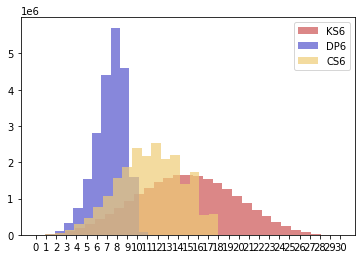

In [8]:
measures = [i +"6" for i in ("KS","DP","CS") ]
dMatDict = dict(zip(measures, [i+".csv" for i in  measures]))
colorDict=dict(zip(measures, ["#C55B", "#55CB","#EC7B"]))

for key in dMatDict.keys():
    dMatDict[key] = pd.read_csv("DistanceMatrices"+"/"+dMatDict[key], index_col=0)
    dMatDict[key].index = dMatDict[key].columns
    
maxDists =[]
for dMat in measures:
    df = dMatDict[f"{dMat}"].values.astype(int).reshape(-1)
    plt.hist(df, bins=df.max()+1, color = colorDict[dMat], label= dMat, alpha=.7)
    maxDists.append(df.max())
plt.xticks(np.arange(max(maxDists)+1))
plt.legend()
#plt.savefig("Figures/"+ f"5A dist hist", bbox_inches='tight')
print(maxDists)
plt.show()

# Minimal distance to PrefConvergence

[0.5, 0.7500000000000002, 0.8340000000000003, 0.8750000000000003, 0.9000000000000004, 0.9500000000000004, 0.9750000000000004, 0.9800000000000004, 0.9900000000000004]
[1.0, 2.0000000000000018, 3.01204819277109, 4.000000000000011, 5.000000000000018, 10.00000000000008, 20.000000000000338, 25.000000000000533, 50.000000000002174]


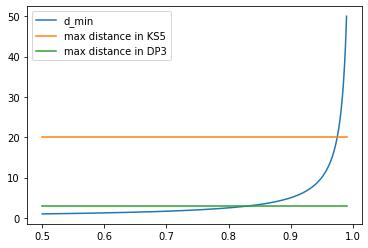

In [9]:
x = np.arange(0.5,.991,.001)
y = .5/(1-x)
import matplotlib.pyplot as plt
plt.plot(x, y, label="d_min")
plt.plot(x, np.full(x.shape, 20), label="max distance in KS5")
plt.plot(x, np.full(x.shape, 3), label="max distance in DP3")
plt.legend()
print([x[i] for i in range(len(x)) if (True if y[i]%1 < 1e-14 else int(y[i])!=1 and int(y[i])!=2 and y[i]%1 < 2e-2)])

print([y[i] for i in range(len(y)) if (True if y[i]%1 < 1e-14 else int(y[i])!=1 and int(y[i])!=2 and y[i]%1 < 2e-2)])

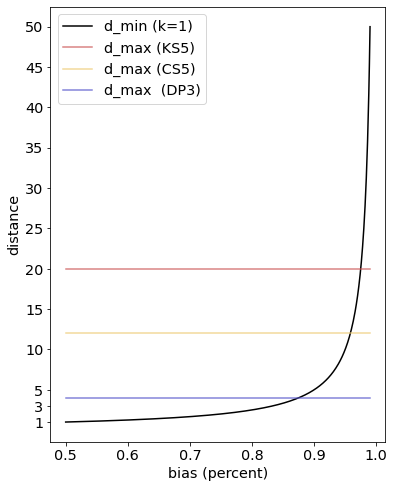

In [10]:
markerDict = dict(zip(["KS","DP","CS"],["s","D","v"]))
colorDict=dict(zip(["KS","DP","CS"], ["#C55B", "#55CB","#EC7B"]))
if True:
    metrics = [ "dist2C", ]
    for metric in metrics:
        plt.figure(figsize=(6,8))    
        plt.plot(x, y, label="d_min (k=1)", color="#000")
        plt.plot(x, np.full(x.shape, 20), label="d_max (KS5)", color = colorDict["KS"])
        plt.plot(x, np.full(x.shape, 12), label="d_max (CS5)", color = colorDict["CS"])
        plt.plot(x, np.full(x.shape, 4), label="d_max  (DP3)", color = colorDict["DP"])        
        plt.xlabel('bias (percent)', fontsize='x-large')
        plt.ylabel("distance", fontsize='x-large')
        plt.legend(loc='center left')
        plt.xticks(fontsize='x-large')
        plt.yticks([i for i in range(1,6, 2)]+[i for i in range(10, 51, 5)], fontsize='x-large')
        plt.legend(loc='upper left', fontsize='x-large')
        plt.savefig("Figures/"+ "d_min and max", bbox_inches='tight')
        plt.show()
    

# Create Dijkstra-Example Graph

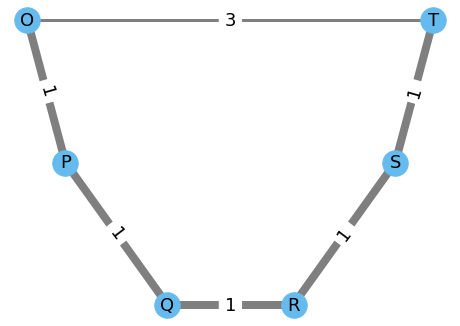

In [12]:
G = nx.Graph()
shorts = [tuple([chr(ord("O")+i), chr(ord("O")+i+1)]) for i in range(5)]
G.add_edges_from(shorts,weight=10, length=1)
long = [("O","T")]
G.add_edges_from(long, length=3, weight = 1)

schriftgröße = 18

pos = nx.spectral_layout(G)
fig = plt.figure(figsize= (8,5.75))
nx.draw_networkx_edges(G, pos, edgelist= shorts , alpha=.5, width = 8)
nx.draw_networkx_edges(G, pos, edgelist= long , alpha=.5, width = 3)
labels = nx.get_edge_attributes(G,'length')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels, font_size=schriftgröße)
nx.draw_networkx_nodes(G, pos, node_size=650, node_color="#6BE")
nx.draw_networkx_labels(G,pos, font_size=schriftgröße)

plt.box(False)
#plt.savefig("Figures/"+ "Dijkstra_Example", bbox_inches='tight', transparent=0)


# Calculate the number of possible rankings

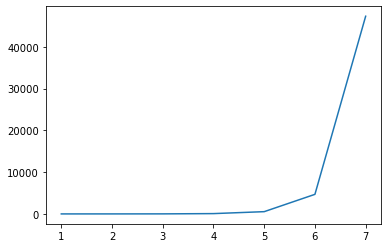

In [15]:
L=[]
rTup = 1,8
for i in range(*rTup):
    L.append(dists.weakRankings(i).shape[0])
plt.plot(range(*rTup), L)